In [1]:
# ✅ Imports
from PIL import Image
import pytesseract
from transformers import BlipProcessor, BlipForConditionalGeneration
from gtts import gTTS
from IPython.display import Audio, display
import matplotlib.pyplot as plt

In [2]:
# ✅ Load Image
image_path = r"C:\Users\Admin\Desktop\VisionVoice\data\sample1.jpg"
img = Image.open(image_path).convert("RGB")

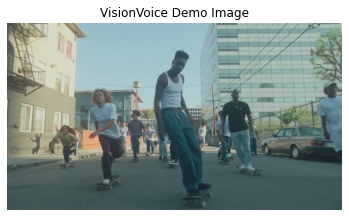

In [3]:
# ✅ Show Image
plt.imshow(img)
plt.axis("off")
plt.title("VisionVoice Demo Image")
plt.show()

In [4]:
# ✅ OCR
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

img = Image.open(r"C:\Users\Admin\Desktop\VisionVoice\data\sample1.jpg")
ocr_text = pytesseract.image_to_string(img)
print(ocr_text)

In [5]:
# ✅ BLIP Caption
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base", use_fast=False)
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
inputs = processor(img, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

In [6]:
# ✅ Clean text
def clean_text(text):
    lines = text.strip().split('\n')
    cleaned = [line.strip() for line in lines if line.strip() != '']
    return ' '.join(cleaned)

cleaned_ocr = clean_text(ocr_text)
cleaned_caption = clean_text(caption)


In [7]:
# ✅ Final Description
final_description = f"{cleaned_caption}. The text on the image reads: {cleaned_ocr}."
print("🧠 Final Description:\n", final_description)

🧠 Final Description:
 a group of people skate down a street. The text on the image reads: .


In [8]:
# ✅ Text to Speech
tts = gTTS(text=final_description, lang='en')
audio_path = "../outputs/final_output.mp3"
tts.save(audio_path)
display(Audio(audio_path))